<a href="https://colab.research.google.com/github/laksh262001/Deeplearning-and-AI/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

In [2]:
# Other imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Get data 
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2022-09-24 17:39:58--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2022-09-24 17:39:59 (31.1 MB/s) - ‘moore.csv’ saved [2302/2302]



In [4]:
# Load data
data = pd.read_csv('moore.csv', header=None).values
# Make a 2-D array of size N x D where D=1
X = data[:,0].reshape(-1, 1)
Y = data[:, 1]

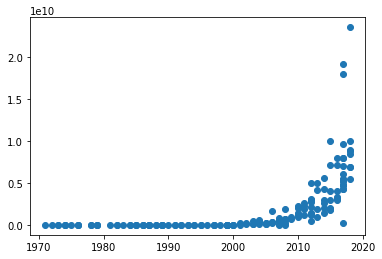

In [5]:
# Plot the data - It is exponential
plt.scatter(X, Y)

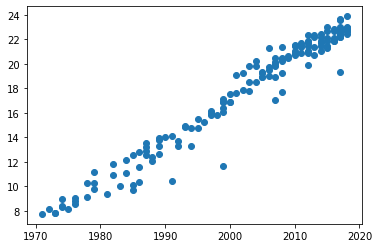

In [6]:
# Since we want a linear model, we take log
Y = np.log(Y)
plt.scatter(X, Y)

In [7]:
X = X - X.mean()

In [13]:
# Now create our Tensorflow model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1)),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')
# model.compile(optimizer='adam', loss='mse')

# learning rate scheduler
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

#Train the model
r = model.fit(X, Y, epochs=200, callbacks=(scheduler))

Epoch 1/200
6/6 [==============================] - 1s 3ms/step - loss: 403.5723 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 367.9204 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 3ms/step - loss: 402.8373 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 464.1862 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 5ms/step - loss: 239.7260 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 3ms/step - loss: 118.8857 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 3ms/step - loss: 116.5315 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 74.0716 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 57.0173 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 47.8228 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 

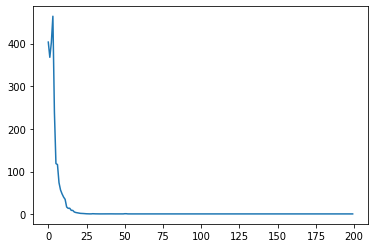

In [14]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')

In [16]:
# Get the stage of the line
# The slope of the line is related to the doubling rate of transistor count
print(model.layers)
print(model.layers[0].get_weights)

<bound method Layer.get_weights of <keras.layers.core.dense.Dense object at 0x7fa8c09c3b90>>


In [17]:
# The slope of the line is:
a = model.layers[0].get_weights()[0][0,0]

In [18]:
print("Time to double:", np.log(2) / a)

Time to double: 2.0632718696478904


In [20]:
# Analytical solution
X = np.array(X).flatten()
Y = np.array(Y)
denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean()*X.sum() ) / denominator
b = (Y.mean() * X.dot(X) - X.mean() * X.dot(Y) )/ denominator
print(a, b)
print("Time to double:", np.log(2) / a)

0.341682487387313 17.764939393631764
Time to double: 2.0286295205239204
